In [ ]:
pip install scikit-plot

In [ ]:
# read data import
import pandas as pd
import numpy as np

# data visualization import
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

movie_reviews = pd.read_csv('/content/IMDB-Dataset.csv')
movie_reviews


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


<Axes: xlabel='sentiment', ylabel='count'>

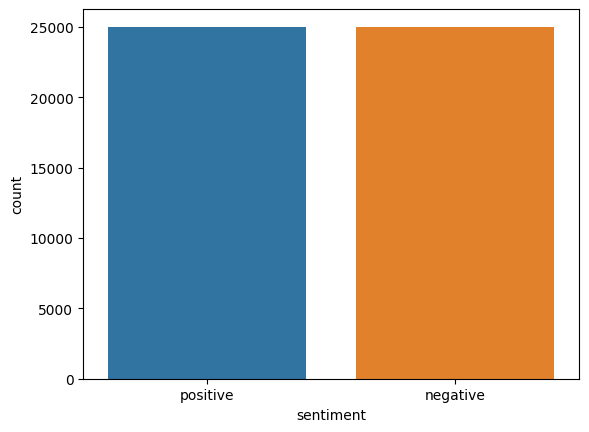

In [ ]:
sns.countplot(x='sentiment',data=movie_reviews)

In [ ]:
# preprocessing nlp
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# import models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# metrics imports
from sklearn.metrics import accuracy_score,classification_report as cr
from sklearn.metrics import roc_curve, auc

# nltk downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
def preprocess(text):
  #for removing symbols
  text = re.sub('[^A-Za-z]+', ' ', text)
  text = re.sub(r'[?|!|\'|"|#|,+]', r'', text)

  #for removing numbers
  text  = ''.join((x for x in text if not x.isdigit()))

  #Tokenization:
  token=word_tokenize(text.lower())

  #stop word removal:
  clean_text = [word for word in token if word not in stopwords.words("english")]

  #Stemming
  clean_text = [stemmer.stem(word) for word in clean_text]

  #Lemmetize
  clean_text = [lemmatizer.lemmatize(word) for word in clean_text]

  #Joining tokens into text
  clean_text = ' '.join(clean_text)

  return clean_text

In [ ]:
clean_data = movie_reviews.copy()

review=[]

for text in movie_reviews['review']:
  clean_text = preprocess(text)
  review.append(clean_text)

clean_data ['review'] = review

In [ ]:
clean_data

,review,sentiment
0,one review mention watch oz episod hook right ...,positive
1,wonder littl product br br film techniqu unass...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,negative
4,petter mattei love time money visual stun film...,positive
...,...,...
49995,thought movi right good job creativ origin fir...,positive
49996,bad plot bad dialogu bad act idiot direct anno...,negative
49997,cathol taught parochi elementari school nun ta...,negative
49998,go disagre previou comment side maltin one sec...,negative


In [ ]:
x = clean_data['review']
y = clean_data['sentiment']

tfidf = TfidfVectorizer(max_features=500)
X_tfidf = tfidf.fit_transform(x).toarray()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X = map(list, zip(X_train, y_train))

In [ ]:
# Define the models
rf = RandomForestClassifier()
lr = LogisticRegression()

rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
lr_pred = lr.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
lr_acc = accuracy_score(y_test, lr_pred)

print(f'Random Forest Accuracy: {rf_acc} ')
print(cr(y_test, rf_pred))
print(f'Logistic Regression Accuracy: {lr_acc} ')
print(cr(y_test, lr_pred))

Random Forest Accuracy: 0.8262 
              precision    recall  f1-score   support

    negative       0.82      0.83      0.83      4961
    positive       0.83      0.83      0.83      5039

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

Logistic Regression Accuracy: 0.8496 
              precision    recall  f1-score   support

    negative       0.86      0.84      0.85      4961
    positive       0.84      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


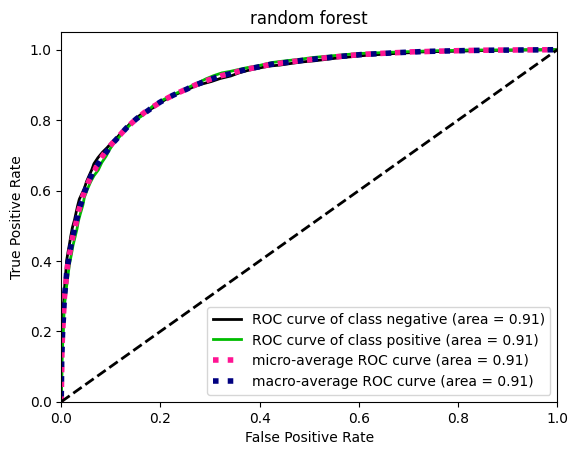

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


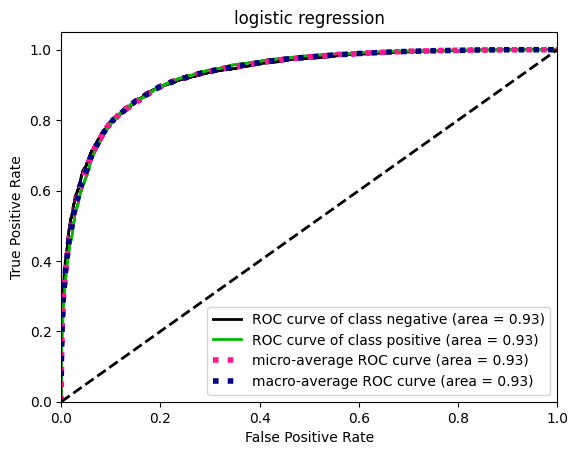

In [ ]:
rf_probs = rf.predict_proba(X_test)
lr_probs = lr.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, rf_probs)
plt.title("random forest")
plt.show()

skplt.metrics.plot_roc_curve(y_test, lr_probs)
plt.title("logistic regression")
plt.show()

Prediction

In [ ]:
def prediction(texts):
  predictions = []
  text_tokens = []

  for text in texts:
    new_data = preprocess(text)
    X_new = tfidf.transform([new_data]).toarray()
    y_pred_new = lr.predict(X_new)   # change to best model
    predictions.append(y_pred_new)
    texts = word_tokenize(text)
    text_tokens.append(" ".join(texts[:10]))

  return (text_tokens, predictions)

In [ ]:
test = pd.read_csv('/content/IMBD-test.csv')
texts = test['review']

text_tokens, predicted_labels = prediction(texts)

for i in range(len(text_tokens)):
  text = text_tokens[i]
  label = predicted_labels[i]
  print("{:<70s} {}".format(text, label))

I recently watched the movie 'The Greatest Showman , '                 ['positive']
Unfortunately , I recently watched the movie 'The Last Airbender       ['negative']


In [ ]:
test

,review,Unnamed: 1
0,I recently watched the movie 'The Greatest Sho...,Positive
1,"Unfortunately, I recently watched the movie 'T...",Negative


<Axes: >

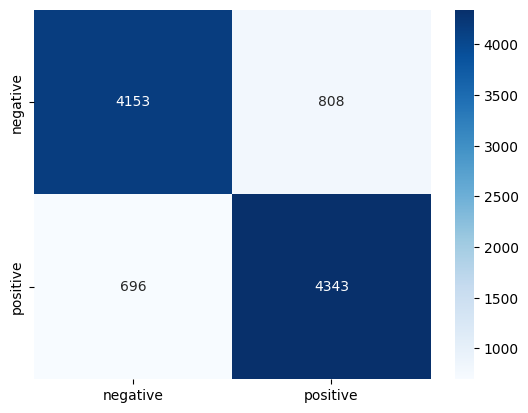

In [ ]:
from sklearn import metrics
labels = set(list(clean_data['sentiment']))
cm = metrics.confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels, fmt="g")

<Axes: >

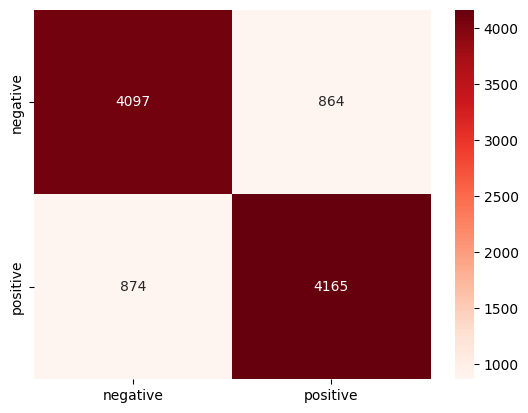

In [ ]:
cm = metrics.confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, cmap='Reds', xticklabels=labels, yticklabels=labels, fmt="g")